# Problema

**Análise de Crédito**

Desenvolver um modelo propensão de inadimplência.

Grupo:
- Luiz Henrique (352631)
- Gildo Moraes (352486)
- Igor Mazzeto (352368)

Professor:
- Elthon Freitas

# 1. Bibliotecas, Ambiente e Funções Auxiliares

## 1.1 Instalação

In [1]:
!pip install scikit-learn --quiet
!pip install flask --quiet

## 1.2 Importação das Bibliotecas

In [2]:
# Pacotes Básicos
import pandas as pd
import numpy as np
import os
import joblib

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Funções/Configurações do Notebook

In [3]:
# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# 2. Carregamento dos Dados

## 2.1 Importação

In [4]:
folder_path = 'G:/Meu Drive/Gildo - Google Drive/3b. Acadêmico/MBA/14. Machine Learning Operation/c. Atividades e Trabalhos/Trabalho Final/Entregáveis/datasets'
file_name = 'loan_default.csv'
file_path = os.path.join(folder_path, file_name)
df_raw = pd.read_csv(file_path)

# 3. Descrição dos Dados

## 3.0 Dicionário das Variáveis

![Dicionário Variaveis.png](<attachment:Dicionário Variaveis.png>)
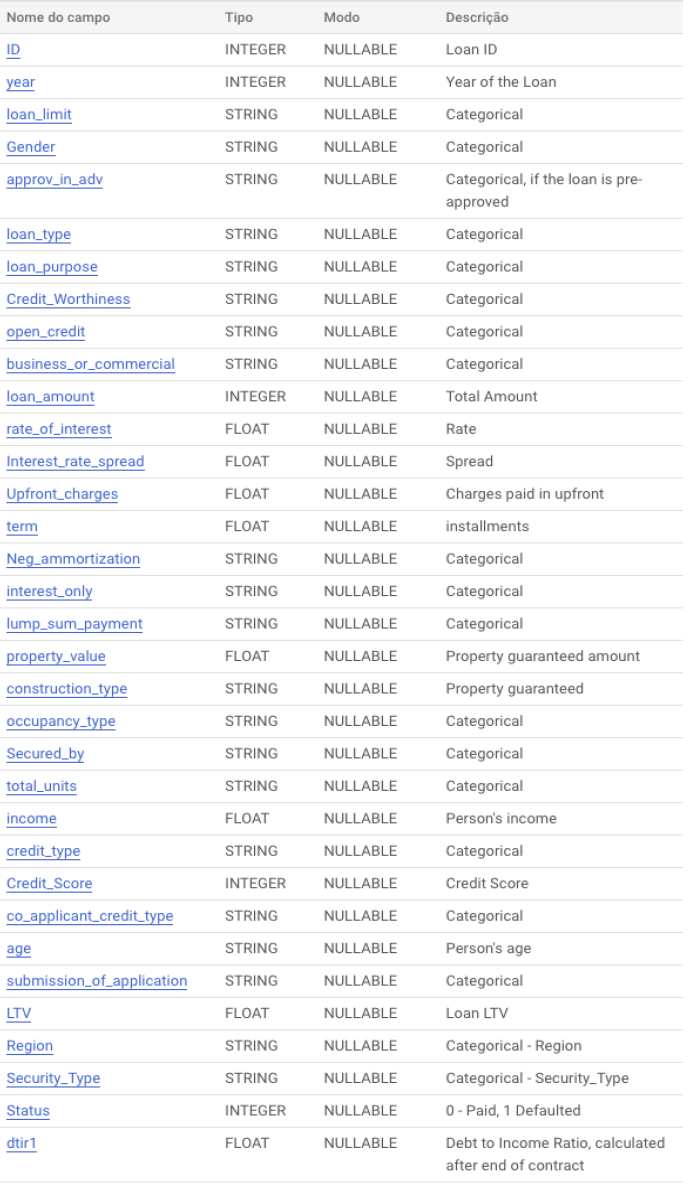

## 3.1 Tipos de Dados

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df_raw.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,466500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,0.0,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,656500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,8640.0,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,106500,NaN,NaN,NaN,240.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,1680.0,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,406500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,7560.0,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN


## 3.2 Checando Valores Únicos

In [7]:
df_raw.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co_applicant_credit_type          2
age                         

## 3.3 Checando Valores Faltantes

In [8]:
# Total de Nulos
cont_nulos = df_raw.isnull().sum()[df_raw.isnull().sum() > 0]
cont_nulos

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64

## 3.4 Checando Valores Duplicados

In [9]:
# Total de Duplicados
df_raw.duplicated().sum()

0

## 3.5 Exploratory Data Analysis

In [10]:
# Checando distribuição entre Adimplentes e Inadimplentes
# Calculate the count of each status
status_counts = df_raw['Status'].value_counts()

# Calculate the percentage of each status
status_percentage = df_raw['Status'].value_counts(normalize=True) * 100

# Combine counts and percentages into a single DataFrame
status_distribution = pd.DataFrame({
    'Count': status_counts,
    'Percentage (%)': status_percentage
})

# Display the result
print(status_distribution)

         Count  Percentage (%)
Status                        
0       112031       75.355485
1        36639       24.644515


In [11]:
unique_values = df_raw['age'].unique()
print(unique_values)

['55-64' '45-54' '35-44' '>74' '25-34' '65-74' '<25' nan]


# 4. Data Cleaning

In [12]:
df = df_raw.copy()

In [13]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,466500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,0.0,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,656500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,8640.0,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,106500,NaN,NaN,NaN,240.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,1680.0,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,406500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,7560.0,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN


## 4.1 Data Reduction

In [14]:
# Drop de Colunas (Sem Relevância)

#colunas = ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 
#                        'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units','income', 'credit_type', 'Credit_Score', 
#                        'co_applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']

colunas_para_remover = ['ID', 'year']

df = df.drop(colunas_para_remover, axis=1)

In [15]:
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,cf,Male,nopre,type3,p4,l1,nopc,nob/c,466500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,0.0,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,cf,Male,nopre,type2,p3,l1,nopc,b/c,656500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,8640.0,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,106500,NaN,NaN,NaN,240.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,1680.0,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,cf,Male,nopre,type3,p3,l1,nopc,nob/c,406500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,7560.0,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN


In [16]:
# Exclusão de Dados Faltantes

# 5. Feature Engineering

In [17]:
# Aplicar Label Encoding para variáveis Categóricas
variaveis_label_encoding = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'rate_of_interest', 'Interest_rate_spread', 
                       'Upfront_charges', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 
                      'co_applicant_credit_type', 'submission_of_application', 'age', 'Region', 'Security_Type']


label_encoders = {}
for col in variaveis_label_encoding:
    if col in df.columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

In [18]:
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,2,0,1,0,0,0,0,206500,131,22516,58271,360.0,1,1,0,NaN,1,1,0,0,4980.0,2,552,1,3,1,NaN,0,1,1,NaN
1,0,2,0,2,3,0,0,1,466500,131,22516,58271,360.0,1,1,1,NaN,1,1,0,0,0.0,2,765,1,2,1,NaN,0,1,1,NaN
2,0,2,0,1,2,0,0,0,656500,131,22516,58271,360.0,1,1,1,NaN,1,1,0,0,8640.0,2,880,1,1,1,NaN,0,1,1,NaN
3,0,2,0,0,3,0,0,1,106500,131,22516,58271,240.0,1,1,0,NaN,1,1,0,0,1680.0,2,880,1,2,1,NaN,2,1,1,NaN
4,0,2,0,2,2,0,0,1,406500,131,22516,58271,360.0,1,1,1,NaN,1,1,0,0,7560.0,2,768,1,2,0,NaN,0,1,1,NaN


# 6. Análise de Crédito

## 6.1 Separação entre Treino e Teste

In [19]:
# Separação das features e da variável alvo
X = df.drop('Status', axis=1)
y = df['Status']

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6.2 Treinamento do Modelo

In [20]:
# Treinamento do modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 6.3 Resultados

In [21]:
# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

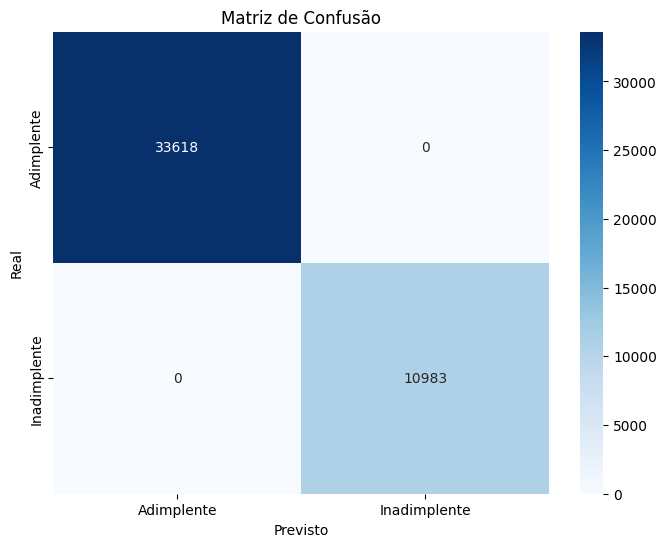

In [22]:
# Cálculo da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotagem da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Adimplente', 'Inadimplente'], 
            yticklabels=['Adimplente', 'Inadimplente'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [23]:
# Exibição dos resultados
print(f'Acurácia: {accuracy}')
print('Relatório de Classificação:')
print(report)

Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33618
           1       1.00      1.00      1.00     10983

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



# 7. Salvamento do Modelo

In [24]:
# Salvar o modelo treinado
joblib.dump(model, 'G:/Meu Drive/Gildo - Google Drive/3b. Acadêmico/MBA/14. Machine Learning Operation/c. Atividades e Trabalhos/Trabalho Final/Entregáveis/models/model.joblib')
print("Modelo treinado e salvo com sucesso.")

Modelo treinado e salvo com sucesso.
